___
#### 
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `sara.eug.rod.rey@gmail.com` </font>
___



# <font color= #2E9AFE> Census Income Machine Learning End To End Project With Deployment</font>


What we will be doing:

1. Bussiness ProblemUnderstanding

2. Data Collection

3. Data Understanding

4. Data Preprocessing & Data Cleaning

5. Data Exploration

6. Feature Engineering

7. Predictive Modeling

8. Model Evaluation

9. Model Deployment

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

The prediction task is to determine whether a person makes over $50K a year.



## Data

This dataset contains 14 independent ("X") variables and 1 ("Y") dependent variable.

**Independent variables**

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [23]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, power_transform, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

In [2]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from lightgbm import LGBMClassifier

In [3]:
#Read data

data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## EDA



In [4]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
pd.DataFrame(data.isnull().sum(), columns=["Count"])

,Count
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [7]:
#unique values in each column
{column:data['education'].nunique() for column in data.select_dtypes('object').columns}

{'workclass': 16,
 'education': 16,
 'marital.status': 16,
 'occupation': 16,
 'relationship': 16,
 'race': 16,
 'sex': 16,
 'native.country': 16,
 'income': 16}

### Univariate Analysis

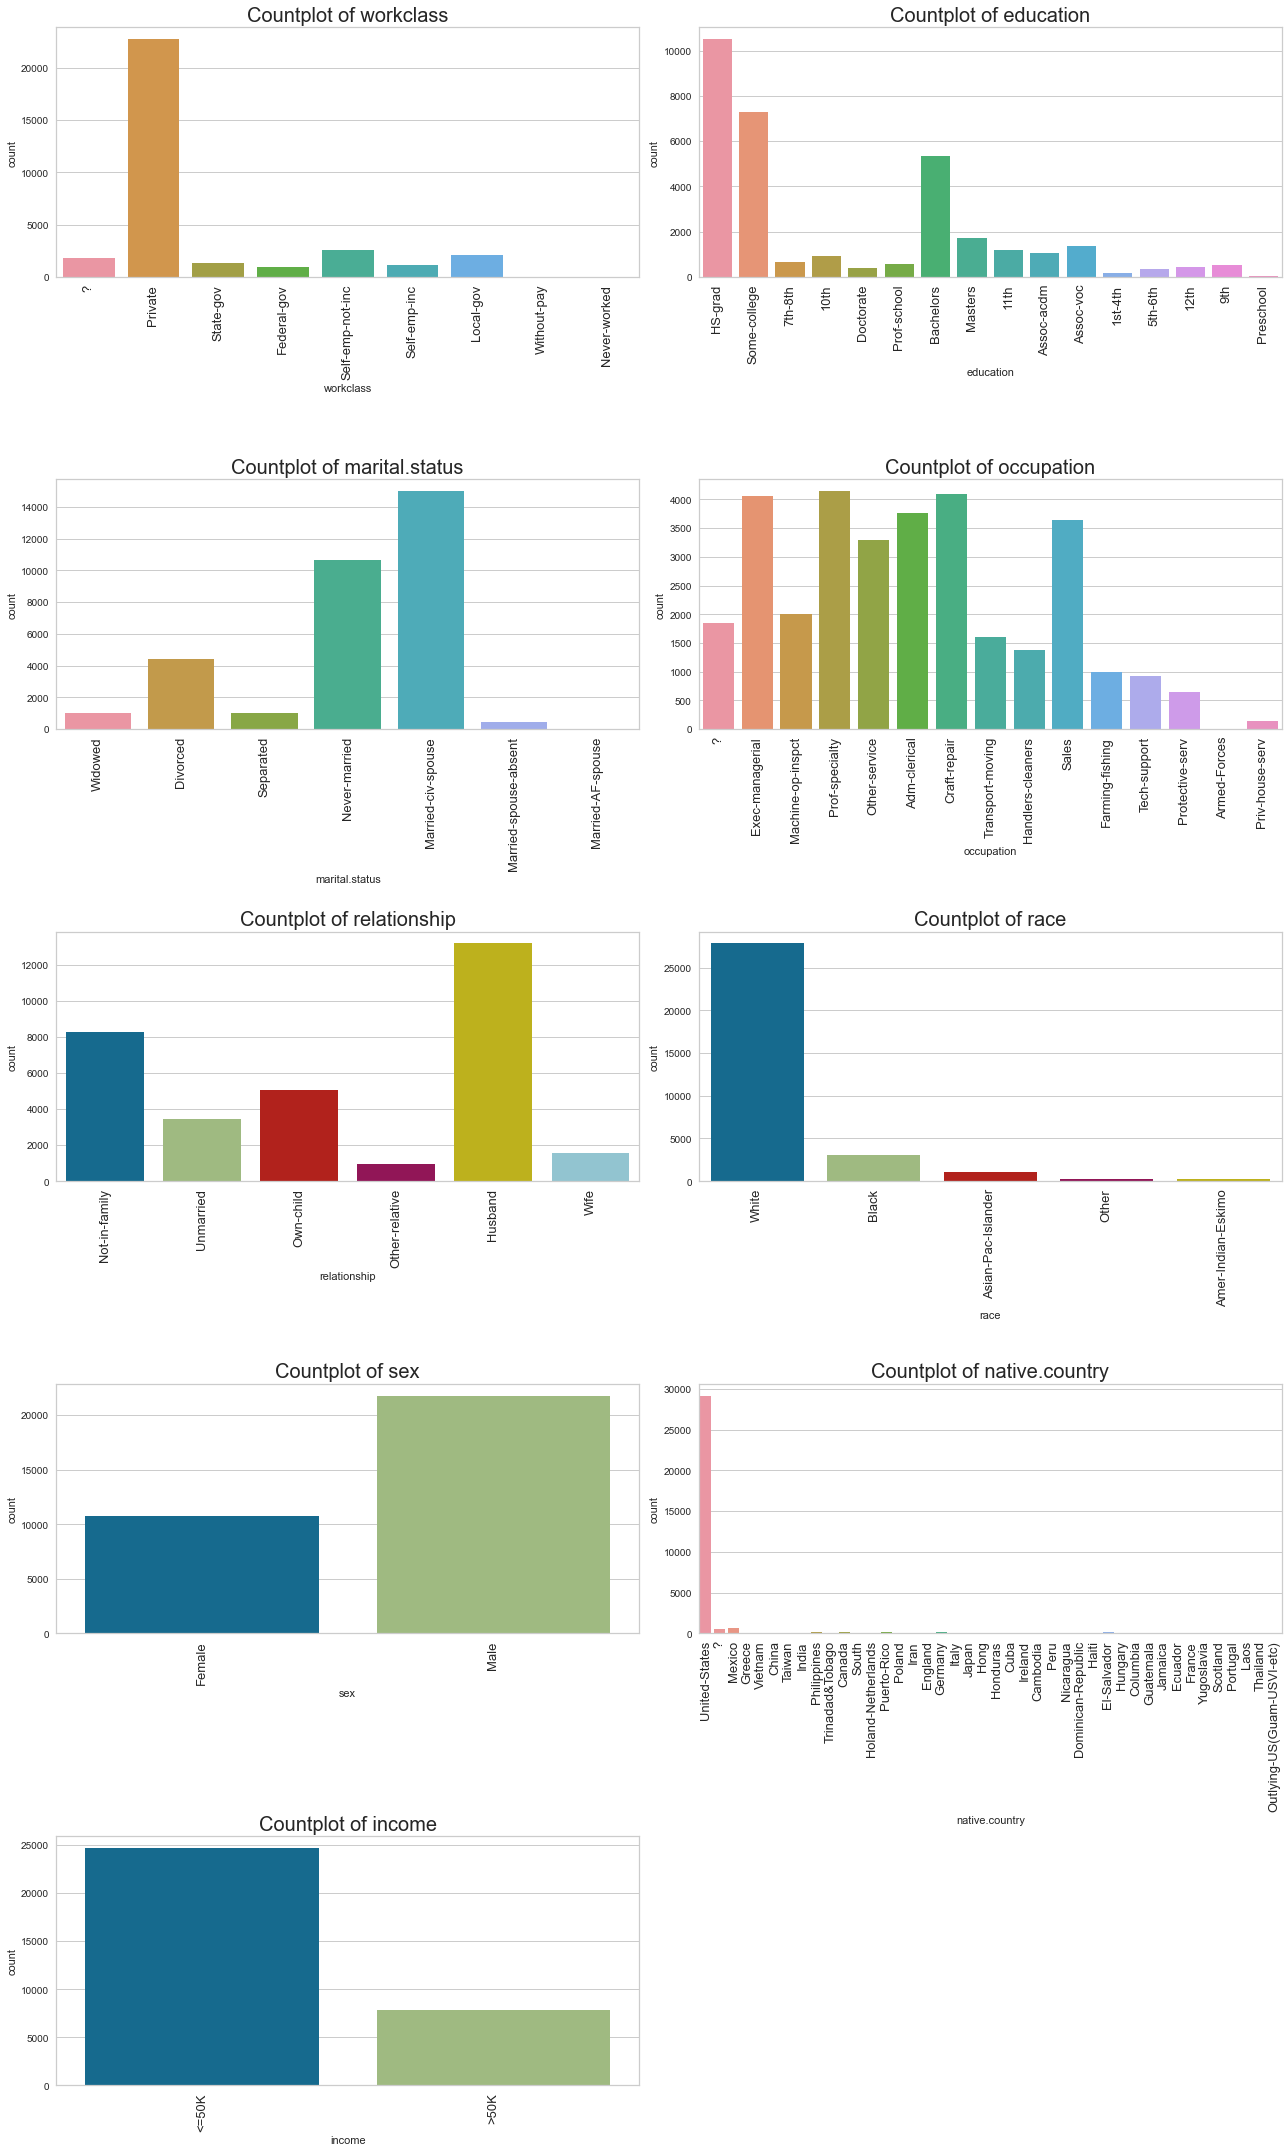

In [8]:
col = data.select_dtypes('object').columns
plt.figure(figsize=(18,30))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.countplot(data[col[i]])
    plt.title(f"Countplot of {col[i]}", fontsize=20)
    plt.xticks(rotation=90, fontsize=13)
    plt.tight_layout()

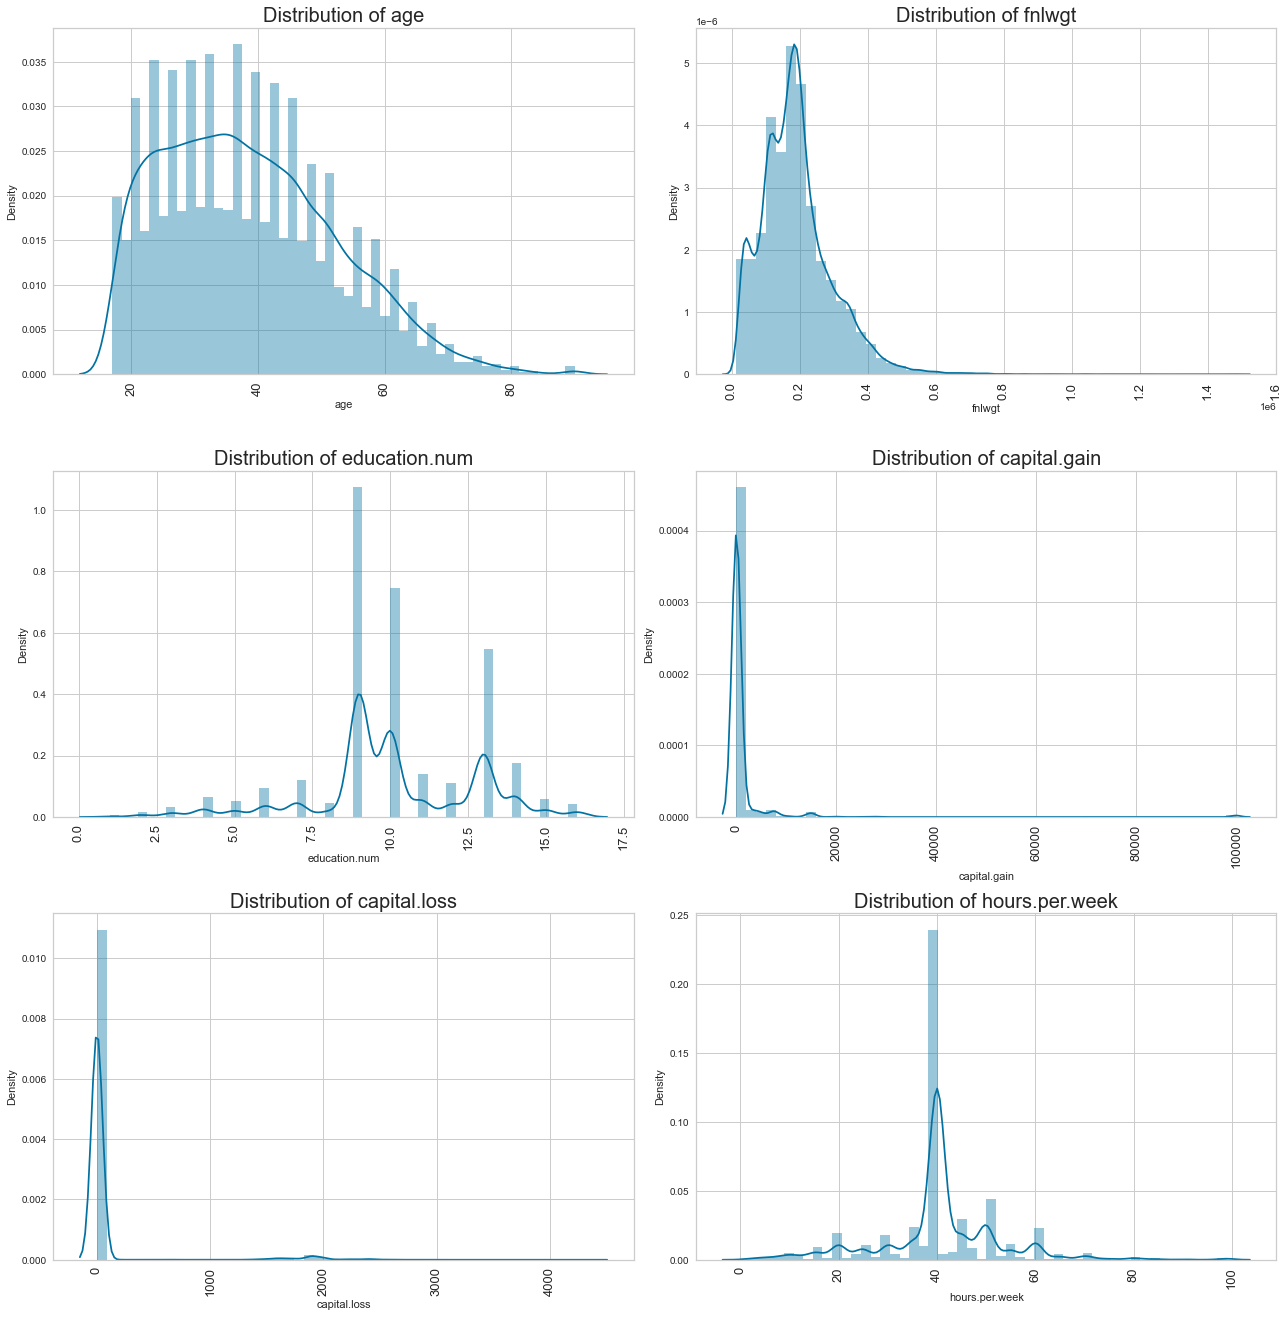

In [9]:
col = data.select_dtypes('int','float').columns
plt.figure(figsize=(18,30))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.distplot(data[col[i]])
    plt.title(f"Distribution of {col[i]}", fontsize=20)
    plt.xticks(rotation=90, fontsize=13)
    plt.tight_layout()

## Bivariate Analysis

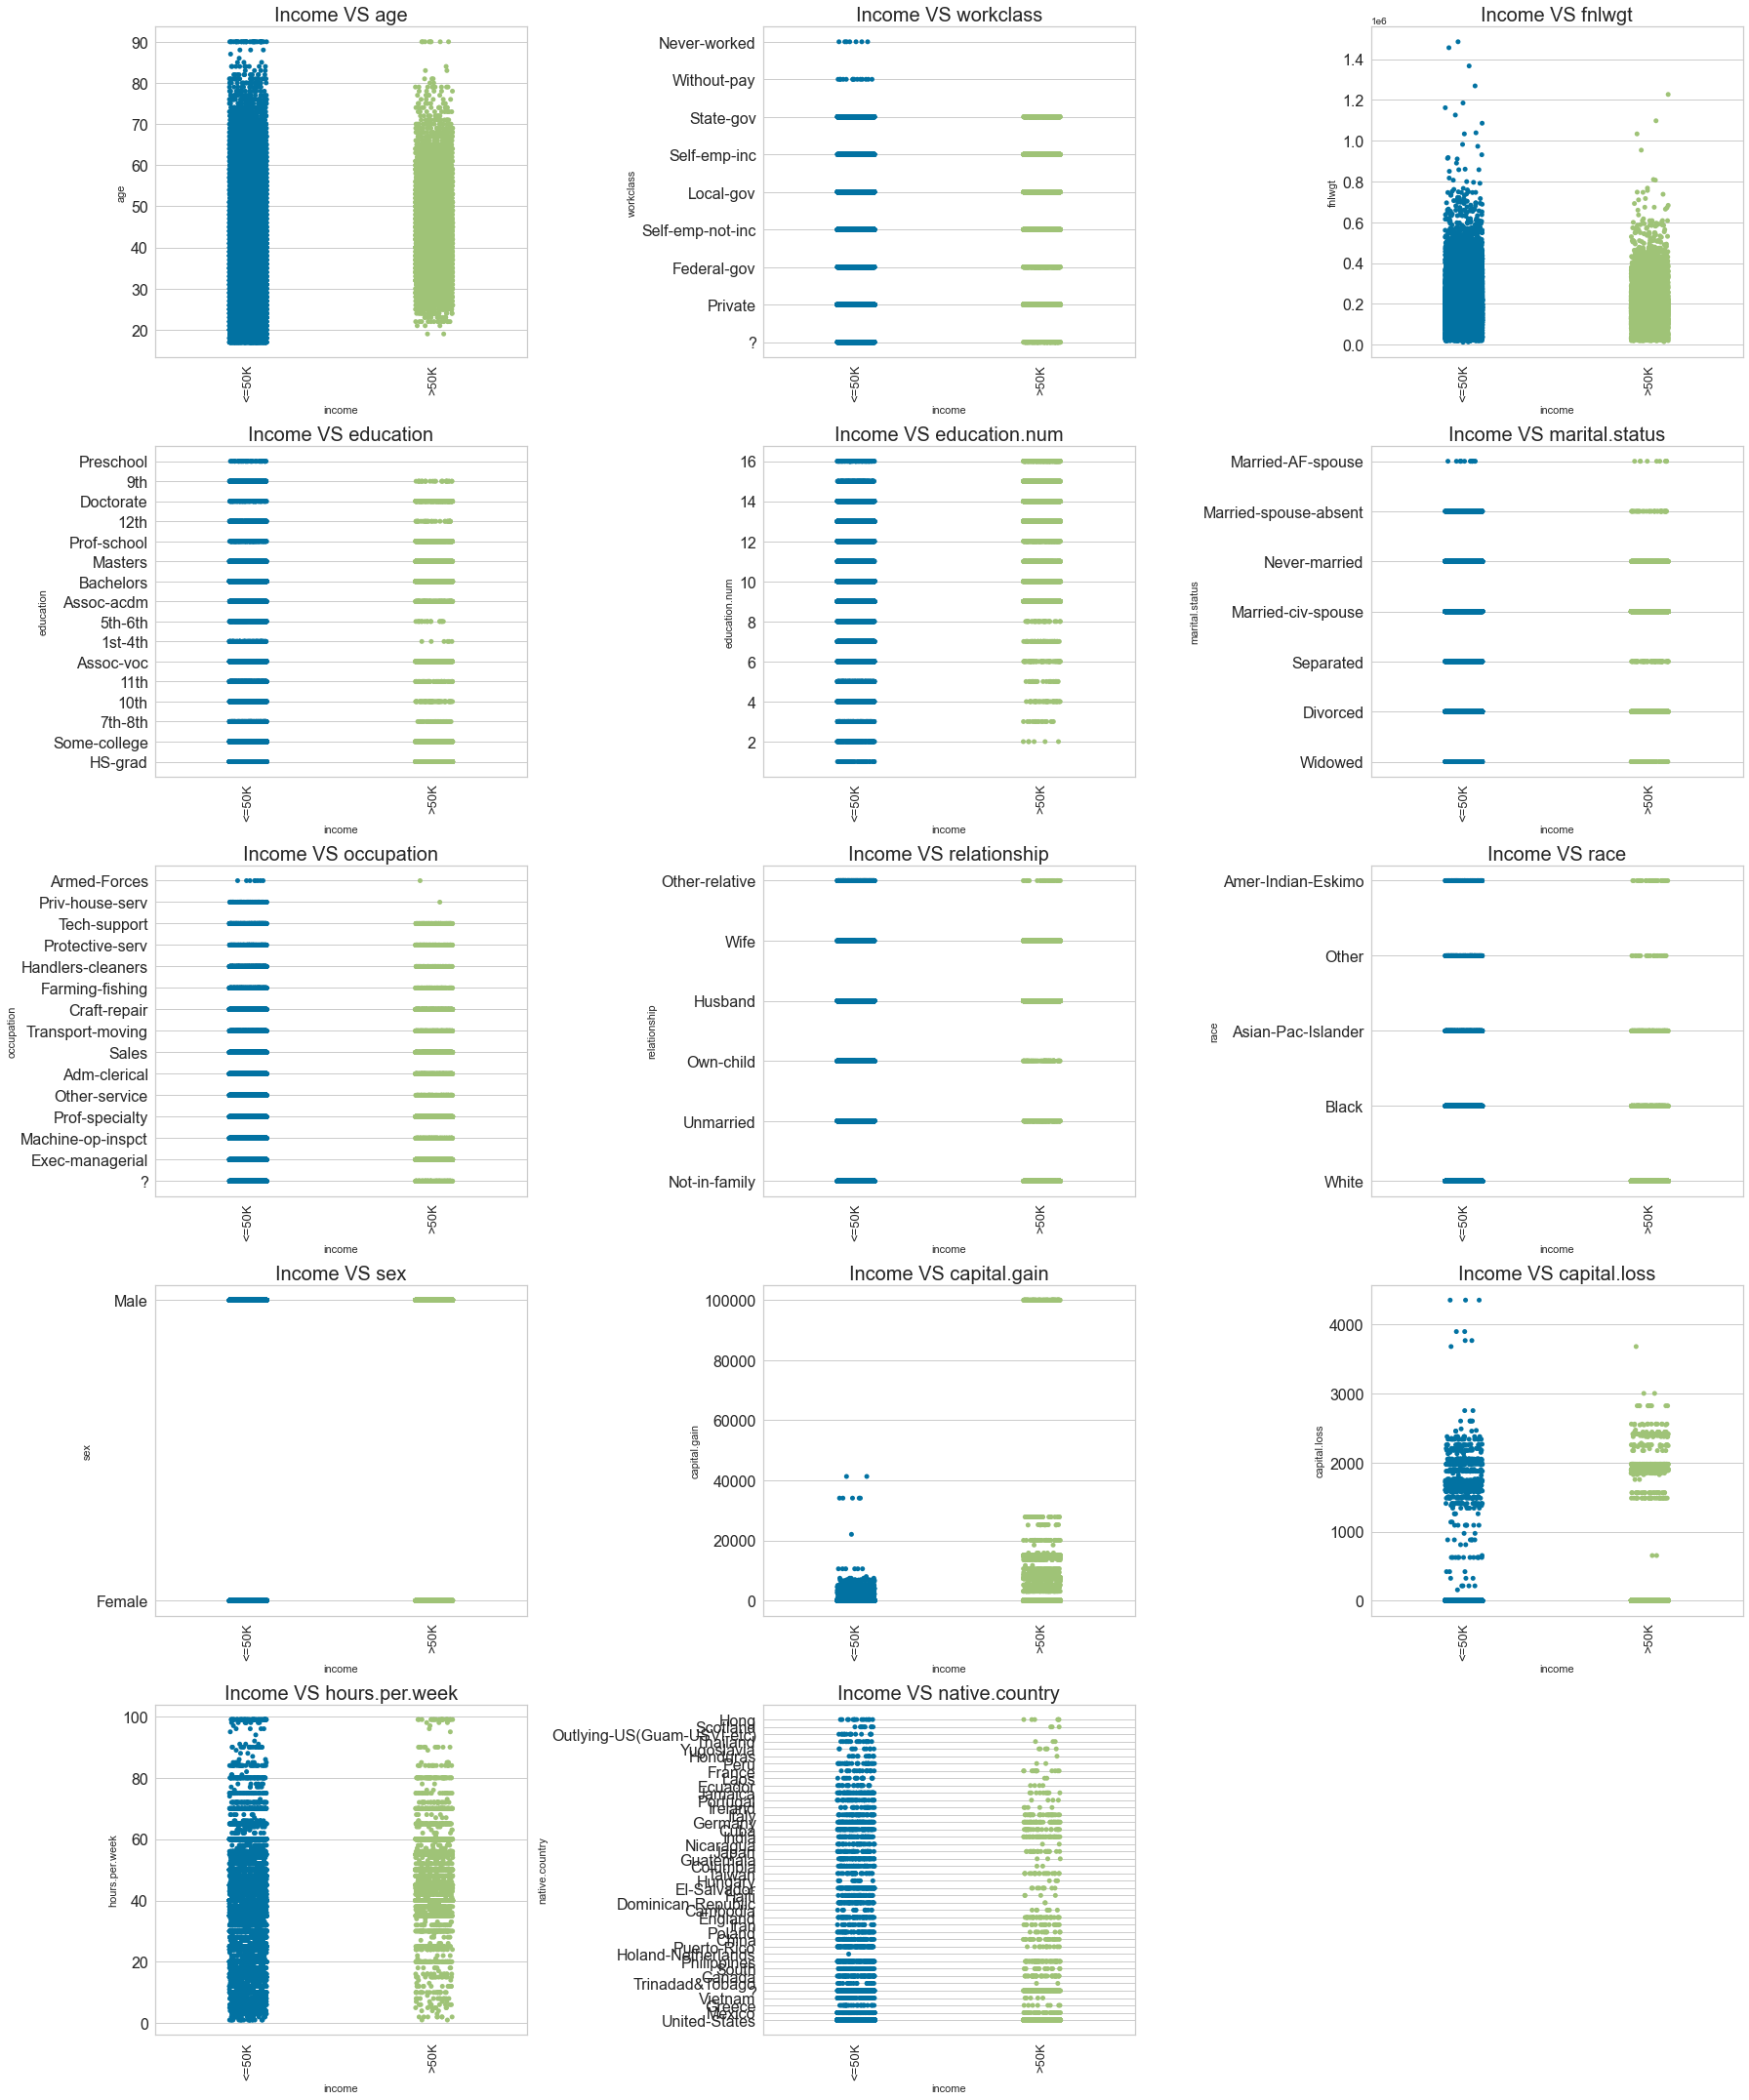

In [10]:
#Independent variable accross all dependent variables

col2=['age','workclass','fnlwgt','education','education.num','marital.status',
     'occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']

plt.figure(figsize=(25,30))
for i in range(len(col2)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x=data['income'], y=data[col2[i]])
    plt.title(f"Income VS {col2[i]}", fontsize=20)
    plt.xticks(rotation=90, fontsize=13)
    plt.yticks(fontsize=16)
    plt.tight_layout()

**Observations:**

- Age: People with age between 25–65 have high chances to get earn more than 50k
- Workclass: Except "without pay" and "never worked" other workclass have chances to earn more than 50k
- Education: As the education increases, there are more chances to earn more than 50k (same with education_num)
- Marital Status: Except "married af spouse", all have chances to earn more than 50k
- Occupation:  As the occupation increases, there are more chances to earn more than 50k
- Relationship: There is no such effect of the relationship on income, same with SEX
- Capital gain: The more the capital gain, more chances to earn more than 50k



## Feature Engineering

In [11]:
#Feature transformation
encoder = OrdinalEncoder()
def ordinal_encoder(df, column):
    df[column]=encoder.fit_transform(df[column])
    return df

data = ordinal_encoder(data,['education','income','marital.status','occupation','race','relationship','sex','workclass'])

In [12]:
def label_encoder(df):
    df = df.copy()
    le = LabelEncoder()
    df['native.country'] = le.fit_transform(df['native.country'])
    X=df.drop('income', axis=1)
    y=df['income']
    
    return X,y

X,y = label_encoder(data)

<AxesSubplot:>

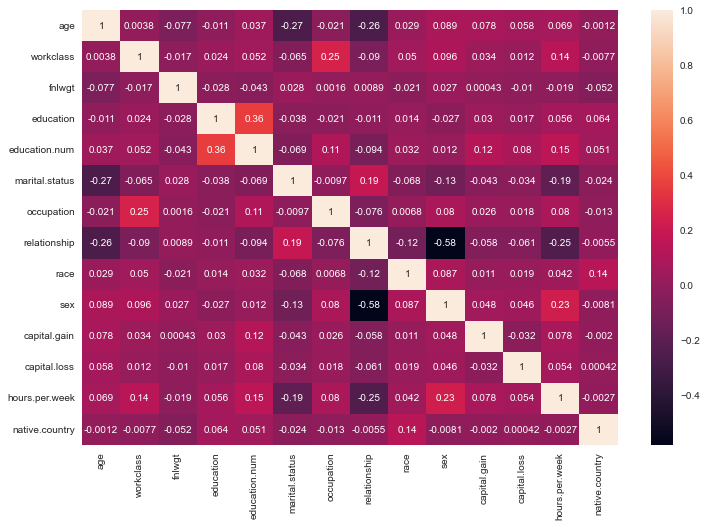

In [13]:
#check for multicollinearity
X_corr = X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr, annot=True)

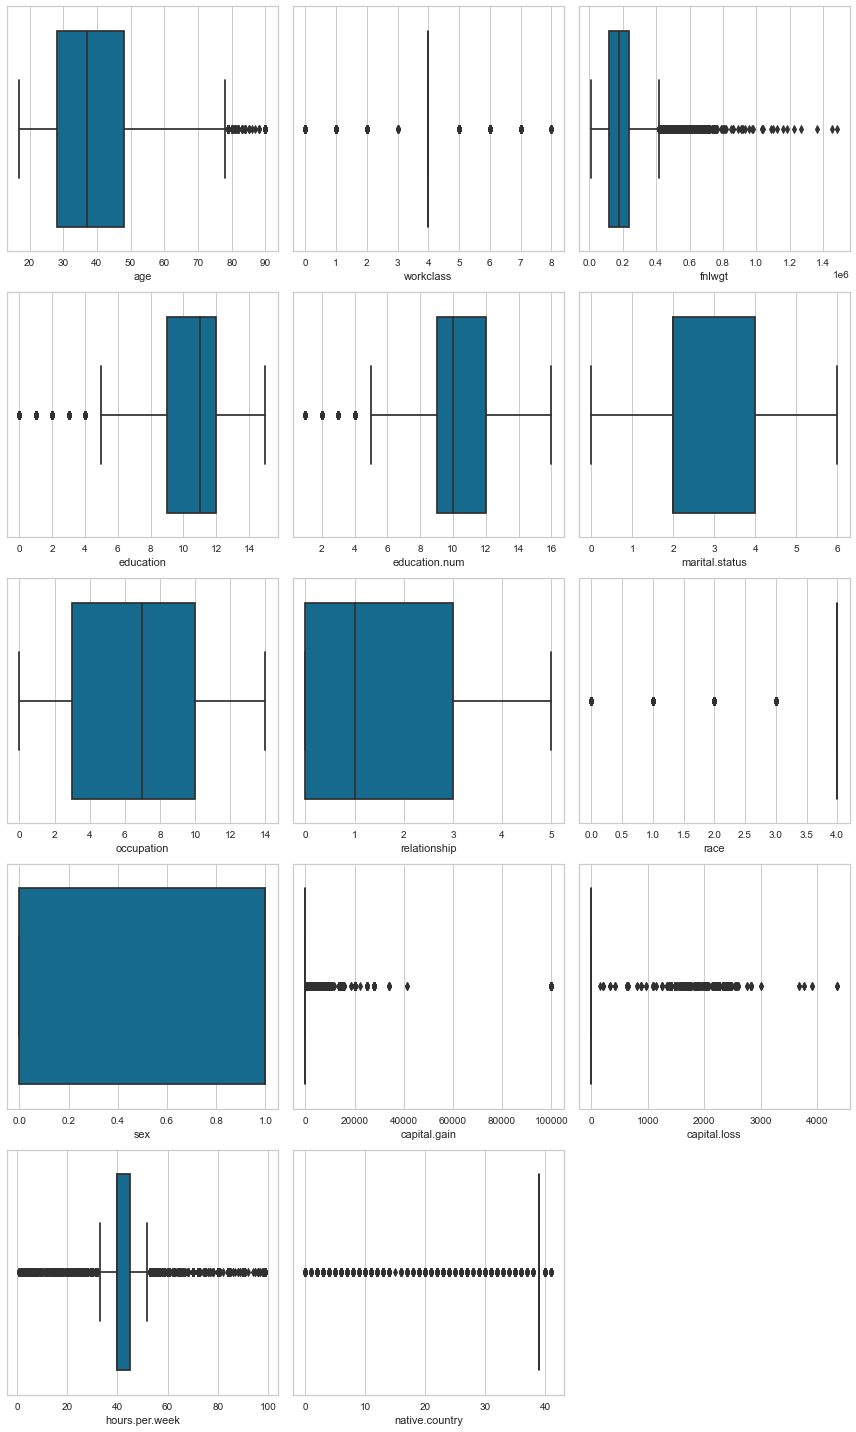

In [14]:
## Outliers
X_val = X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
    plt.subplot(5,3,i+1)
    sns.boxplot(X[X_val[i]])
    plt.tight_layout()

In [15]:
#removing outliers
for col in X.columns:
    percentile = X[col].quantile([0.01,0.98]).values
    X[col][X[col]<=percentile[0]]==percentile[0]
    X[col][X[col]>=percentile[1]]==percentile[1]

In [16]:
#balancing datasets
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)
X_new = pd.DataFrame(X_res, columns=X.columns)
y_new = pd.DataFrame(y_res, columns=['income'])

In [17]:
#skewness
X.skew()

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital.status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
native.country    -3.658303
dtype: float64

In [18]:
#removing skewness
X_new = power_transform(X_new, method='yeo-johnson')
X_new = pd.DataFrame(X_new, columns=X.columns)

In [19]:
#feature scaling
scaler= StandardScaler()
X_new = scaler.fit_transform(X_new)
X_new = pd.DataFrame(X_new, columns=X.columns)

Here we are using **StandardScaler** to scale values, we can only use standardscaler when the data is normally distributed. In this case, the data was skewed that’s why we applied the power transformer to remove skewness so the data was converted into normal distribution and now we can use StandardScaler.

## Modeling

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_new, y_new, test_size = 0.3, random_state=42)

In [21]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier()
}

************************************ LogisticRegression ************************************


Accuracy_Score 0.7603155339805825


SCORE 0.7603155339805825


Cofusion metrics


[[5493 1900]
 [1655 5784]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76      7393
         1.0       0.75      0.78      0.76      7439

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     14832
weighted avg       0.76      0.76      0.76     14832

Cross_Val_Score 0.7669498381877022


ROC AUC Curve


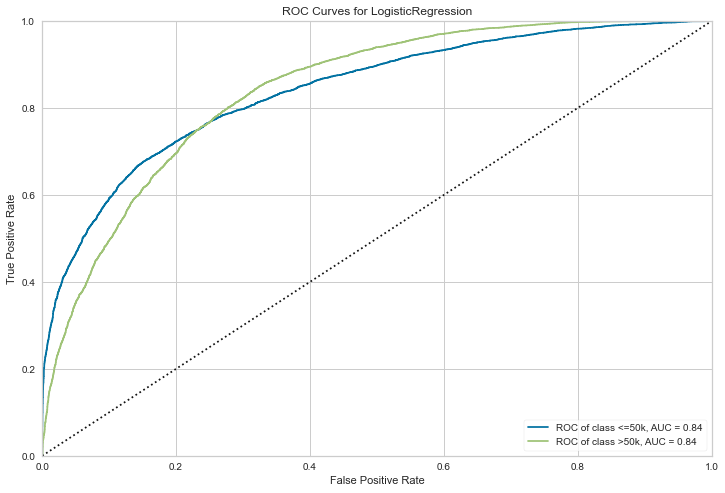

MODEL LEARNING CURVE


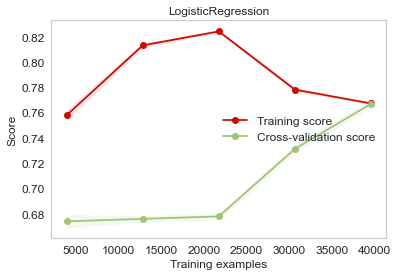

************************************ DecisionTreeClassifier ************************************


Accuracy_Score 0.8629989212513485


SCORE 0.8629989212513485


Cofusion metrics


[[6382 1011]
 [1021 6418]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      7393
         1.0       0.86      0.86      0.86      7439

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832

Cross_Val_Score 0.8617516181229773


ROC AUC Curve


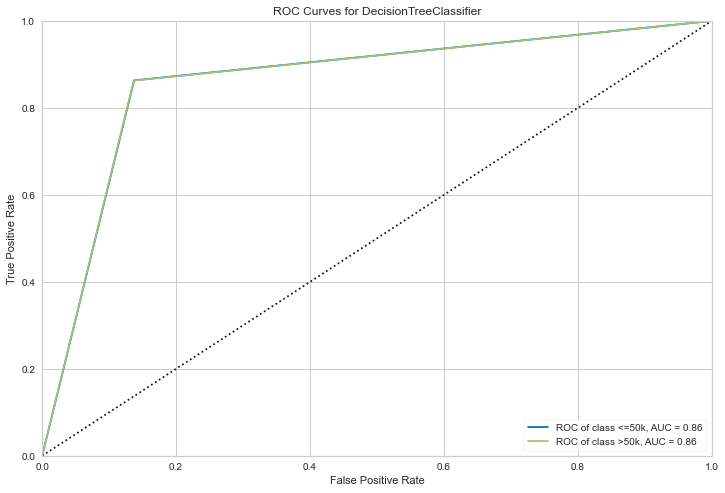

MODEL LEARNING CURVE


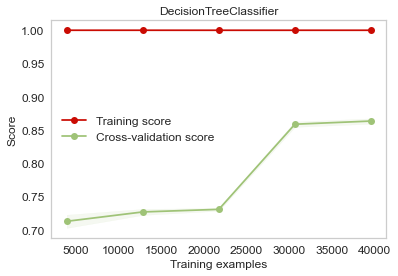

************************************ ExtraTreesClassifier ************************************


Accuracy_Score 0.8952265372168284


SCORE 0.8952265372168284


Cofusion metrics


[[6616  777]
 [ 777 6662]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      7393
         1.0       0.90      0.90      0.90      7439

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross_Val_Score 0.8959142394822006


ROC AUC Curve


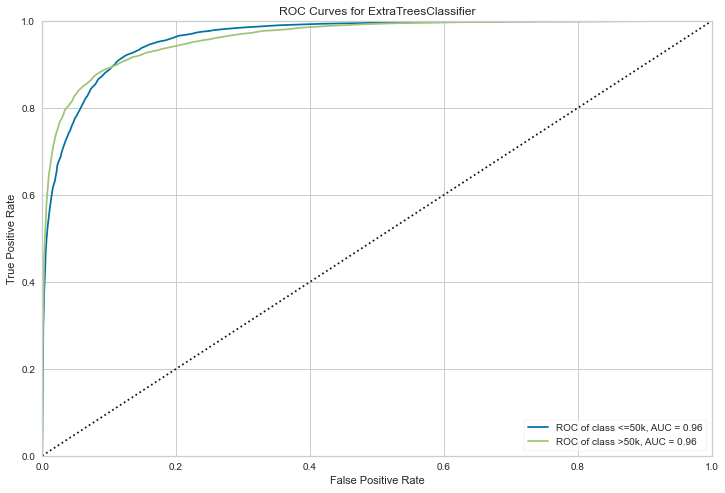

MODEL LEARNING CURVE


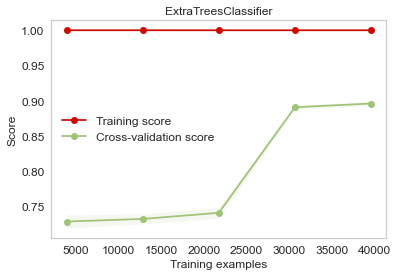

************************************ RandomForestClassifier ************************************


Accuracy_Score 0.8984627831715211


SCORE 0.8984627831715211


Cofusion metrics


[[6720  673]
 [ 833 6606]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7393
         1.0       0.91      0.89      0.90      7439

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

Cross_Val_Score 0.9001415857605177


ROC AUC Curve


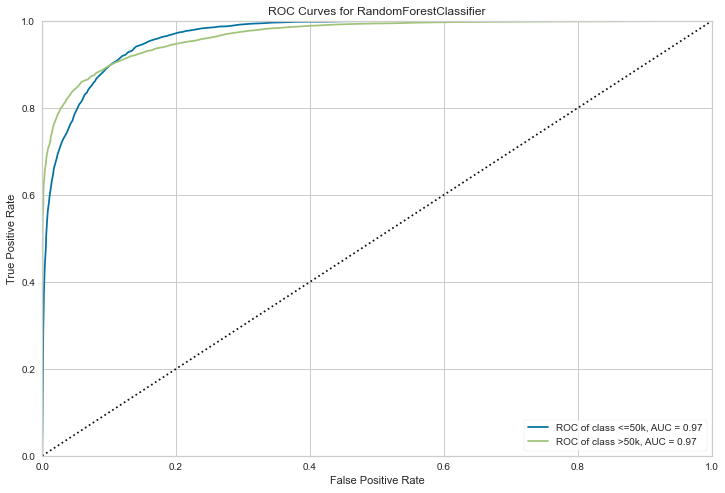

MODEL LEARNING CURVE


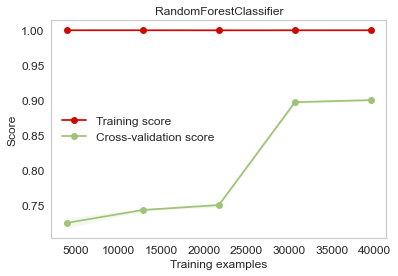

************************************ XGBClassifier ************************************


Accuracy_Score 0.9114077669902912


SCORE 0.9114077669902912


Cofusion metrics


[[6847  546]
 [ 768 6671]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7393
         1.0       0.92      0.90      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Cross_Val_Score 0.9118729773462781


ROC AUC Curve


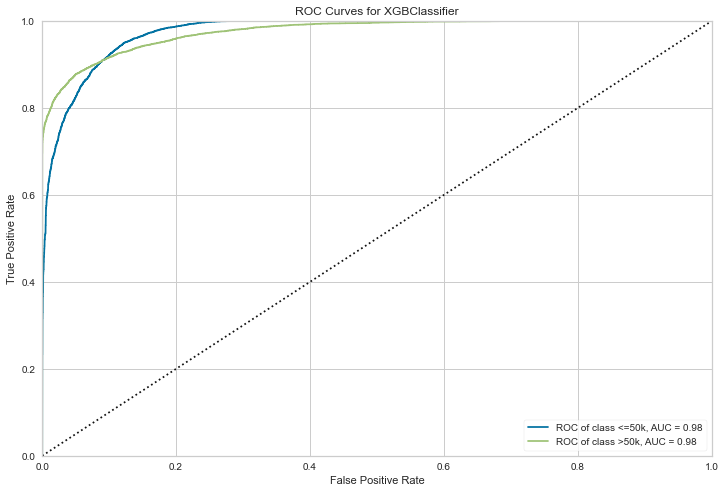

MODEL LEARNING CURVE


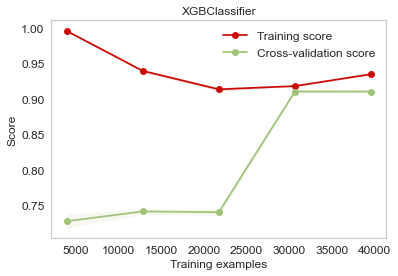

************************************ LGBMClassifier ************************************


Accuracy_Score 0.9136326860841424


SCORE 0.9136326860841424


Cofusion metrics


[[6889  504]
 [ 777 6662]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7393
         1.0       0.93      0.90      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Cross_Val_Score 0.9128033980582524


ROC AUC Curve


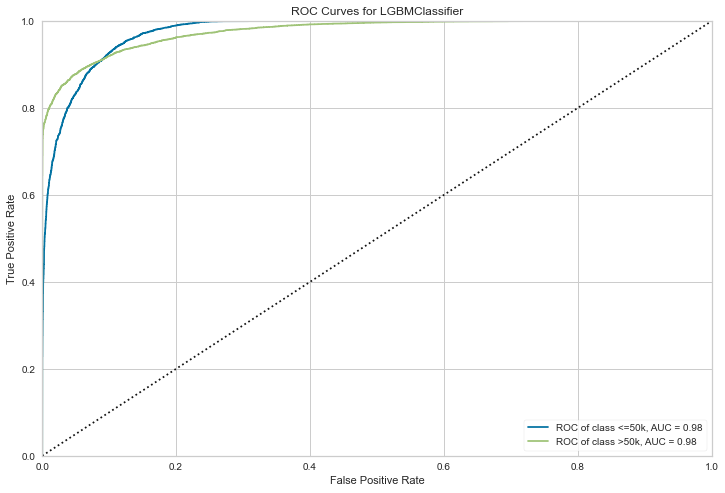

MODEL LEARNING CURVE


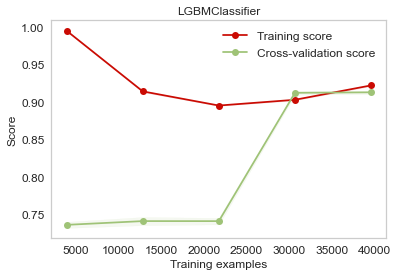

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

Score=[]
CVS=[]
MODEL=[]

for name, model in models.items():
    print("************************************",name,"************************************")
    MODEL.append(name)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print("\n")
    ac=accuracy_score(y_test, y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print('\n')
    print("SCORE", model.score(X_test, y_test))
    print('\n')
    cm=confusion_matrix(y_test, y_pred)
    print("Cofusion metrics")
    print('\n')
    print(cm)
    print("CLASSIFICATION REPORT")
    report = classification_report(y_test, y_pred)
    print('\n')
    print(report)
    csv=cross_val_score(model, X_new, y_new, cv=skf).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print('\n')
    print("ROC AUC Curve")
    plt.figure(figsize=(12,8))
    roc_auc(model, X_train, y_train, X_test, y_test, classes=['<=50k','>50k'], micro=False, macro=False)
    print('MODEL LEARNING CURVE')
    skplt.estimators.plot_learning_curve(model, X_new, y_new, cv=skf, scoring='accuracy', text_fontsize='large', title=name)
    plt.show()
    

In [25]:
#using the lightgbm
LGB=LGBMClassifier()
LGB.fit(X_train,y_train)

LGBMClassifier()

In [26]:
y_pred=LGB.predict(X_test)
accuracy_score(y_test,y_pred)

0.9136326860841424

In [28]:
#Hyperparameter tuning
param={
    'boosting_type': ['gbdt','dart','gross','rf'],
    'n_estimators':[100,500],
    'learning_rate':[0.1,0.01,0.001],
    'importance_type': ['split','gain'],
}
GRID=GridSearchCV(estimator=LGB,scoring='accuracy',param_grid=param,n_jobs=-1,cv=skf)
GRID.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'gross', 'rf'],
                         'importance_type': ['split', 'gain'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500]},
             scoring='accuracy')

In [29]:
GRID.best_params_

{'boosting_type': 'gbdt',
 'importance_type': 'split',
 'learning_rate': 0.1,
 'n_estimators': 100}

In [30]:
LGBM=LGBMClassifier(boosting_type= 'gbdt',
 importance_type= 'split',
 learning_rate= 0.1,
 n_estimators= 100)
     

In [31]:
#final model cross val score
new_csv=cross_val_score(LGBM,X_new,y_new,cv=skf).mean()
new_csv

0.9128033980582524

In [32]:
LGBM.fit(X_train,y_train)
y_p=LGBM.predict(X_test)
print(accuracy_score(y_test,y_p))

0.9136326860841424


ROC AUC CURVE


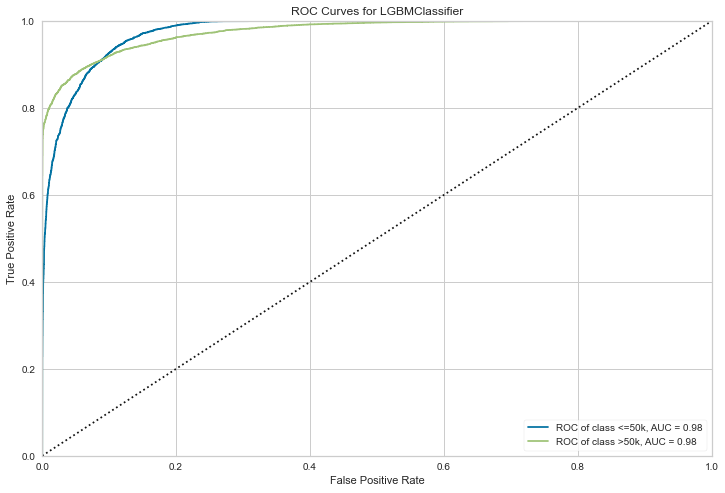

MODEL LEARNING CURVE


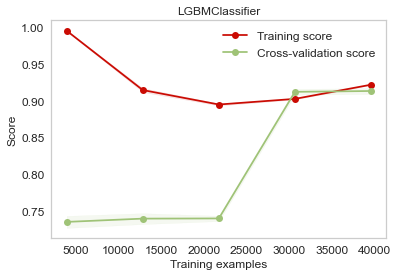

In [33]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(LGBM,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(LGBM,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

In [34]:
print("Confusion metrics")
print('\n')
print(confusion_matrix(y_test,y_p))
print("Classifiaction_report")
print('\n')
print(classification_report(y_test,y_p))
print("Accuracy Score",accuracy_score(y_test,y_p))

Confusion matrics


[[6889  504]
 [ 777 6662]]
Classifiaction_report


              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      7393
         1.0       0.93      0.90      0.91      7439

    accuracy                           0.91     14832
   macro avg       0.91      0.91      0.91     14832
weighted avg       0.91      0.91      0.91     14832

Accuracy Score 0.9136326860841424


In [35]:
import joblib
joblib.dump(GRID,"CensusClassifier.obj")

['CensusClassifier.obj']

In [37]:

model=joblib.load('CensusClassifier.obj')

In [38]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])